In [1]:
import numpy as np
import pandas as pd
import cv2

In [2]:
import matplotlib.pyplot as plt

In [5]:
img_path = 'C:/Users/user/Desktop/TodayLearn/TiL/summary/OpenCV/image/'
# image = cv2.imread("C:/Users/user/Desktop/TodayLearn/TiL/정리용/OpenCV/image/lena.bmp", cv2.IMREAD_GRAYSCALE)
image = cv2.imread(f"{img_path}/lena.bmp", cv2.IMREAD_GRAYSCALE)
print(image)
# plt.imshow(image)
cv2.imshow("lena", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 [162 162 162 ... 170 155 128]
 ...
 [ 43  43  50 ... 104 100  98]
 [ 44  44  55 ... 104 105 108]
 [ 44  44  55 ... 104 105 108]]


In [ ]:
# Flip

In [16]:
src = cv2.imread(f"{img_path}/lena.bmp", cv2.IMREAD_COLOR)
dst = cv2.flip(src, 0)
cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

src.shape

(512, 512, 3)

In [27]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("dst", dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
dst

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [  0,   0,   0, ..., 255,   0,   0],
       [  0,   0,   0, ..., 255, 255, 255],
       [  0,   0,   0, ..., 255, 255, 255]], dtype=uint8)

In [30]:
def start() :
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [33]:
dst = cv2.blur(src, (9, 9), anchor = (-1, -1), borderType = cv2.BORDER_DEFAULT)
cv2.imshow("dst", dst)
start()

In [36]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize = 3)
canny = cv2.Canny(src, 100, 255)

cv2.imshow("soble", sobel)
cv2.imshow("laplacian", laplacian)
cv2.imshow("canny", canny)

start()

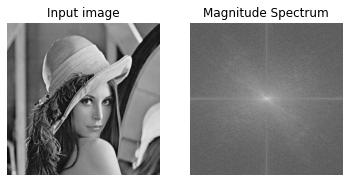

In [44]:
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

plt.subplot(121), plt.imshow(gray, cmap ='gray')
plt.title("Input image"), plt.axis('off')
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.show()

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x26034d2dd60>)

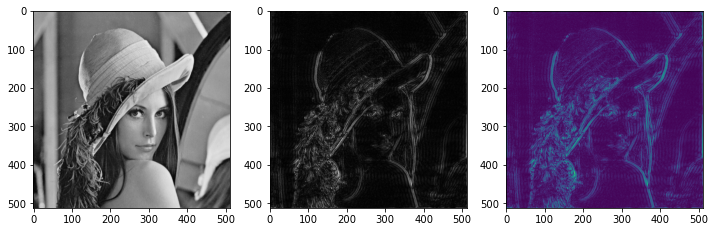

In [53]:
rows, cols = gray.shape
crow, ccol = round(rows/2), round(cols/2)

fshift[crow-30:crow+60, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(gray, cmap = 'gray')
#
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
#
plt.subplot(133),plt.imshow(img_back)